**Tests for part (e)**

In [34]:
from imports import *
from sklearn import datasets
from classes import NeuralNetwork
#from functions import mse, cross_entropy, mse_der, sigmoid, sigmoid_der, reLU, ReLU_der, identity, identity_der, accuracy, cross_entropy, polynomial_features
from functions import *
from autograd import grad
import classes
import functions
import importlib
from sklearn.model_selection import train_test_split

importlib.reload(classes) 
importlib.reload(functions)

<module 'functions' from 'c:\\Users\\Jogga\\Documents\\H25\\FYS-STK4155\\FYS-STK4155_coursework\\Project-2\\Code\\functions.py'>

Using norms with $\eta$ = 0.1

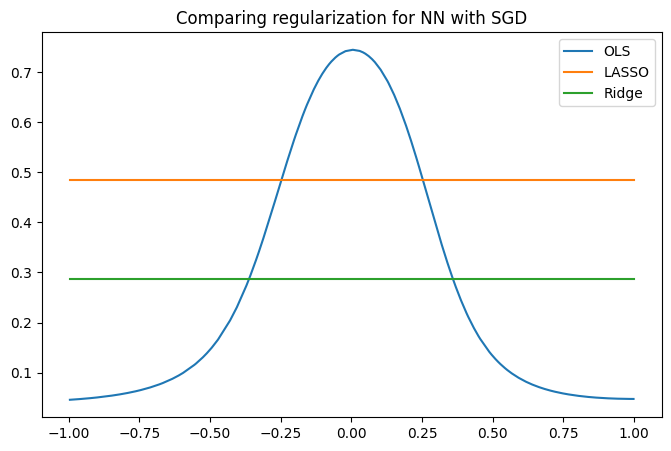

In [42]:
import os, random, numpy as np
state = 50
np.random.seed(state)

n = 1000
x = np.linspace(-1, 1, n).reshape(-1, 1)
y = 1/(1 + 25 * x**2) +  np.random.normal(0, 0.01, x.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=state)
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(x_train.reshape(-1,1))
Y_train = scaler_y.fit_transform(y_train.reshape(-1,1))

X_test = scaler_X.transform(x_test.reshape(-1,1))
Y_test = scaler_y.transform(y_test.reshape(-1,1))

LinRegl1 = NeuralNetwork(1, [50,100, 1], [sigmoid, sigmoid, sigmoid], [sigmoid_der, sigmoid_der, sigmoid_der], cost_fun=mse, cost_der=mse_der, l1=True, lam=0.1)
LinRegl1.train_SGD(X_train, y_train, learning_rate=0.02, epochs=500, batch_size=100)
y_predl1 = LinRegl1.feed_forward(X_test)

LinRegl2 = NeuralNetwork(1, [50,100, 1], [sigmoid, sigmoid, sigmoid], [sigmoid_der, sigmoid_der, sigmoid_der], cost_fun=mse, cost_der=mse_der, l2=True, lam=0.1)
LinRegl2.train_SGD(X_train, y_train, learning_rate=0.02, epochs=500, batch_size=100)
y_predl2 = LinRegl2.feed_forward(X_test)

LinReg = NeuralNetwork(1, [50,100, 1], [sigmoid, sigmoid, sigmoid], [sigmoid_der, sigmoid_der, sigmoid_der], cost_fun=mse, cost_der=mse_der)
LinReg.train_SGD(X_train, y_train, learning_rate=0.02, epochs=500, batch_size=100)
y_pred = LinReg.feed_forward(X_test)


sort_indices = np.argsort(x_test.flatten())

import os

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

os.makedirs(save_dir, exist_ok=True)

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(x_test[sort_indices], y_pred[sort_indices], label="OLS")
ax.plot(x_test[sort_indices], y_predl1[sort_indices], label="LASSO")
ax.plot(x_test[sort_indices], y_predl2[sort_indices], label="Ridge")

ax.set_title("Comparing regularization for NN with SGD")
ax.legend()


save_path = os.path.join(save_dir, "comparison_fitADAMnnAll_2hl.png")

#fig.savefig(save_path, dpi=300, bbox_inches='tight')

Using norms with $\eta$ = 0.001

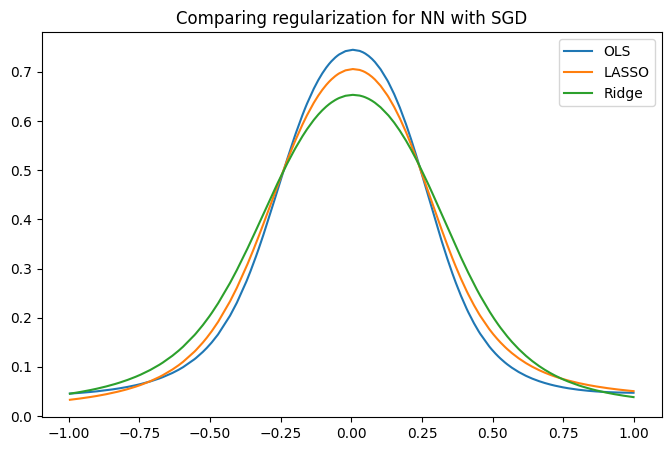

In [43]:
import os, random, numpy as np
state = 50
np.random.seed(state)

n = 1000
x = np.linspace(-1, 1, n).reshape(-1, 1)
y = 1/(1 + 25 * x**2) +  np.random.normal(0, 0.01, x.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=state)
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(x_train.reshape(-1,1))
Y_train = scaler_y.fit_transform(y_train.reshape(-1,1))

X_test = scaler_X.transform(x_test.reshape(-1,1))
Y_test = scaler_y.transform(y_test.reshape(-1,1))

LinRegl1 = NeuralNetwork(1, [50,100, 1], [sigmoid, sigmoid, sigmoid], [sigmoid_der, sigmoid_der, sigmoid_der], cost_fun=mse, cost_der=mse_der, l1=True, lam=1e-3)
LinRegl1.train_SGD(X_train, y_train, learning_rate=0.02, epochs=500, batch_size=100)
y_predl1 = LinRegl1.feed_forward(X_test)

LinRegl2 = NeuralNetwork(1, [50,100, 1], [sigmoid, sigmoid, sigmoid], [sigmoid_der, sigmoid_der, sigmoid_der], cost_fun=mse, cost_der=mse_der, l2=True, lam=1e-3)
LinRegl2.train_SGD(X_train, y_train, learning_rate=0.02, epochs=500, batch_size=100)
y_predl2 = LinRegl2.feed_forward(X_test)

LinReg = NeuralNetwork(1, [50,100, 1], [sigmoid, sigmoid, sigmoid], [sigmoid_der, sigmoid_der, sigmoid_der], cost_fun=mse, cost_der=mse_der)
LinReg.train_SGD(X_train, y_train, learning_rate=0.02, epochs=500, batch_size=100)
y_pred = LinReg.feed_forward(X_test)


sort_indices = np.argsort(x_test.flatten())

import os

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

os.makedirs(save_dir, exist_ok=True)

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(x_test[sort_indices], y_pred[sort_indices], label="OLS")
ax.plot(x_test[sort_indices], y_predl1[sort_indices], label="LASSO")
ax.plot(x_test[sort_indices], y_predl2[sort_indices], label="Ridge")

ax.set_title("Comparing regularization for NN with SGD")
ax.legend()
